In [2]:
import tensorflow as tf

In [3]:
train_dir='C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\train_data'

In [4]:
test_dir='C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\test_data'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagenerator = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'   
)

In [7]:
test_datagenerator = ImageDataGenerator()

In [8]:
import os

In [9]:
os.listdir(train_dir)

['blouse', 'hoodie', 't_shirt']

In [10]:
os.listdir(test_dir)

['blouse', 'hoodie', 't_shirt']

In [11]:
train_generator = train_datagenerator.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 18169 images belonging to 3 classes.


In [13]:
print(train_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [14]:
test_generator = test_datagenerator.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 909 images belonging to 3 classes.


In [15]:
print(test_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [21]:
loaded_model = tf.keras.models.load_model('C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\acc_07099.h5')

In [22]:
loaded_model.layers[0].summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [13]:
loaded_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

29/29 [==============================] - 11s 46ms/step - loss: 18.8431 - accuracy: 0.4258


In [16]:
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [17]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1024)              1529968   
_________________________________________________________________
dense (Dense)                (None, 3)                 3075      
Total params: 1,533,043
Trainable params: 1,520,931
Non-trainable params: 12,112
_________________________________________________________________


In [19]:
model.layers[0]

In [20]:
model.layers[0].summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=20
          )

Epoch 1/20
568/568 [==============================] - 187s 319ms/step - loss: 0.6386 - accuracy: 0.7543
Epoch 2/20
568/568 [==============================] - 183s 322ms/step - loss: 0.3044 - accuracy: 0.8867
Epoch 3/20
568/568 [==============================] - 185s 326ms/step - loss: 0.2368 - accuracy: 0.9063
Epoch 4/20
568/568 [==============================] - 186s 327ms/step - loss: 0.2086 - accuracy: 0.9208
Epoch 5/20
568/568 [==============================] - 185s 326ms/step - loss: 0.1962 - accuracy: 0.9217
Epoch 6/20
568/568 [==============================] - 185s 326ms/step - loss: 0.1666 - accuracy: 0.9402
Epoch 7/20
568/568 [==============================] - 185s 326ms/step - loss: 0.1544 - accuracy: 0.9418
Epoch 8/20
568/568 [==============================] - 186s 326ms/step - loss: 0.1466 - accuracy: 0.9451
Epoch 9/20
568/568 [==============================] - 185s 326ms/step - loss: 0.1347 - accuracy: 0.9500
Epoch 10/20
568/568 [==============================] - 186s 326m

In [40]:
test_loss, test_acc = model.evaluate(test_generator)

29/29 [==============================] - 1s 49ms/step - loss: 0.9125 - accuracy: 0.7096


In [23]:
model.save("acc_07099.h5")

In [58]:
'''
base_model_2 = tf.keras.applications.VGG19(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)

base_model_2.summary()
'''

"\nbase_model_2 = tf.keras.applications.VGG19(\n    input_shape = (224, 224, 3),\n    include_top = False,\n    weights = 'imagenet'\n)\n\nbase_model_2.summary()\n"

In [59]:
'''
model_2 = tf.keras.Sequential([
    base_model_2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model_2.summary()
'''

"\nmodel_2 = tf.keras.Sequential([\n    base_model_2,\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(units=3, activation='softmax')\n])\n\nmodel_2.summary()\n"

In [60]:
'''
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
'''              

"\nmodel_2.compile(optimizer='adam',\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])\n"

In [22]:
'''
model_2.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=15
          )
'''

'\nmodel_2.fit(train_generator,\n          steps_per_epoch=len(train_generator),\n          epochs=15\n          )\n'

In [32]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

image = load_img('C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\predict_test_1.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape(1, 224, 224, 3)
predict = model.predict(x=image)
predict

array([[2.3642147e-04, 9.9921834e-01, 5.4518977e-04]], dtype=float32)

In [34]:
import numpy as np
np.argmax(predict)

1

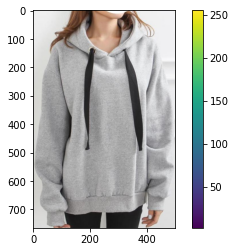

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(load_img('C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\predict_test_1.jpg'))
plt.colorbar()
plt.grid(False)
plt.show()